In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso ,Ridge
from sklearn.metrics import r2_score,mean_absolute_error
import pickle 
import os
import seaborn as sns

In [172]:
path = "D:/singapore_flat_sale_prediction" 
all_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

df_list = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='ISO-8859-1')
    df_list.append(df)
df= pd.concat(df_list, axis=0, ignore_index=True)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [173]:
df["storey_range"].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '46 TO 48',
       '43 TO 45', '49 TO 51', '06 TO 10', '01 TO 05', '11 TO 15',
       '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35'],
      dtype=object)

In [174]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [175]:
for i in df.columns:
    print(i,"--->",df[i].dtype)

month ---> object
town ---> object
flat_type ---> object
block ---> object
street_name ---> object
storey_range ---> object
floor_area_sqm ---> float64
flat_model ---> object
lease_commence_date ---> int64
resale_price ---> float64
remaining_lease ---> object


In [176]:
for i in df.columns:
    print(i,"-->",df[i].isna().sum())

month --> 0
town --> 0
flat_type --> 0
block --> 0
street_name --> 0
storey_range --> 0
floor_area_sqm --> 0
flat_model --> 0
lease_commence_date --> 0
resale_price --> 0
remaining_lease --> 1635983


In [177]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [178]:
print("DATA STARTS FROM --")
print(df.loc[:,"month"][0])

DATA STARTS FROM --
1990-01


In [179]:
print("ENDs at --")
print(df.loc[:,"month"][len(df)-1])


ENDs at --
2014-12


In [180]:
df["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [181]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,1.853866e+06,1.853866e+06,1.853866e+06
mean,9.569146e+01,1.988273e+03,3.206780e+05
std,2.582567e+01,1.065907e+01,1.703608e+05
min,2.800000e+01,1.966000e+03,5.000000e+03
25%,7.300000e+01,1.981000e+03,1.930000e+05
50%,9.300000e+01,1.986000e+03,2.970000e+05
75%,1.130000e+02,1.996000e+03,4.180000e+05
max,3.070000e+02,2.022000e+03,1.568888e+06


In [182]:
df=df.drop(columns="remaining_lease")

In [183]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [184]:
#df.to_csv('D:/singapore_flat_sale_prediction/singaporeflatsdataframe.csv', index=False)

# label encoding for categorical data

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853866 entries, 0 to 1853865
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   month                object 
 1   town                 object 
 2   flat_type            object 
 3   block                object 
 4   street_name          object 
 5   storey_range         object 
 6   floor_area_sqm       float64
 7   flat_model           object 
 8   lease_commence_date  int64  
 9   resale_price         float64
dtypes: float64(2), int64(1), object(7)
memory usage: 141.4+ MB


## Deploying individual label encoder

In [186]:

townle=LabelEncoder()
flatyple=LabelEncoder()
blockle=LabelEncoder()
streetle=LabelEncoder()
rangele=LabelEncoder()
flatmodelle=LabelEncoder()

In [187]:
df["month"]

0          1990-01
1          1990-01
2          1990-01
3          1990-01
4          1990-01
            ...   
1853861    2014-12
1853862    2014-12
1853863    2014-12
1853864    2014-12
1853865    2014-12
Name: month, Length: 1853866, dtype: object

In [188]:
df['month'] = pd.to_datetime(df['month'])
df['Year'] = df['month'].dt.year
df['Month'] = df['month'].dt.month
df=df.drop(columns="month")
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year,Month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1


In [189]:

df["town"]=townle.fit_transform(df["town"])
df["flat_type"]=flatyple.fit_transform(df["flat_type"])
df["block"]=blockle.fit_transform(df["block"])
df["street_name"]=streetle.fit_transform(df["street_name"])
df["storey_range"]=rangele.fit_transform(df["storey_range"])
df["flat_model"]=flatmodelle.fit_transform(df["flat_model"])
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Year,Month
0,0,0,830,13,5,31.0,7,1977,9000.0,1990,1
1,0,0,830,13,2,31.0,7,1977,6000.0,1990,1
2,0,0,830,13,5,31.0,7,1977,8000.0,1990,1
3,0,0,830,13,4,31.0,7,1977,6000.0,1990,1
4,0,2,447,13,2,73.0,20,1976,47200.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...
1853861,26,4,2349,575,5,122.0,9,1988,580000.0,2014,12
1853862,26,5,908,561,5,146.0,15,1988,540000.0,2014,12
1853863,26,5,1785,563,4,164.0,5,1992,738000.0,2014,12
1853864,26,5,672,567,4,152.0,15,1985,592000.0,2014,12


## correlation heatmap

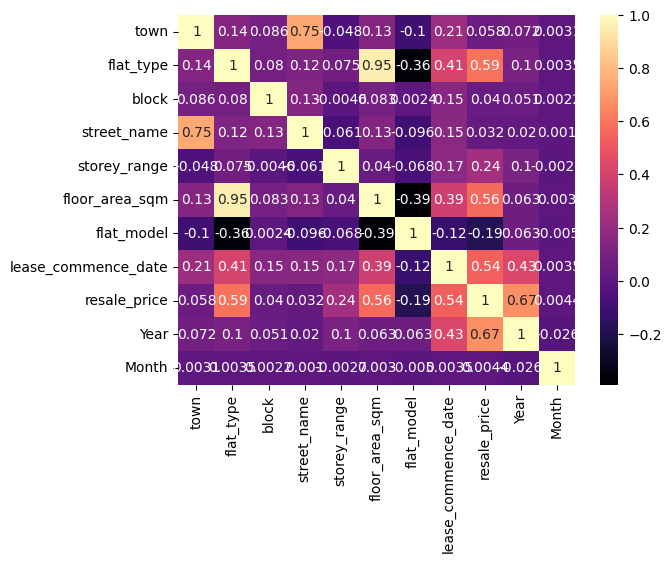

In [190]:
sns.heatmap(df.corr(),cmap='magma',annot=True)
plt.show()

## Defining the target and independent variable

In [191]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'Year', 'Month'],
      dtype='object')

In [192]:
Y = df['resale_price'].values
X= df[['Year',"Month",'town',
         'flat_type','block','street_name',
         'storey_range','floor_area_sqm','flat_model','lease_commence_date']].values

In [193]:
X

array([[1.990e+03, 1.000e+00, 0.000e+00, ..., 3.100e+01, 7.000e+00,
        1.977e+03],
       [1.990e+03, 1.000e+00, 0.000e+00, ..., 3.100e+01, 7.000e+00,
        1.977e+03],
       [1.990e+03, 1.000e+00, 0.000e+00, ..., 3.100e+01, 7.000e+00,
        1.977e+03],
       ...,
       [2.014e+03, 1.200e+01, 2.600e+01, ..., 1.640e+02, 5.000e+00,
        1.992e+03],
       [2.014e+03, 1.200e+01, 2.600e+01, ..., 1.520e+02, 1.500e+01,
        1.985e+03],
       [2.014e+03, 1.200e+01, 2.600e+01, ..., 1.460e+02, 1.500e+01,
        1.985e+03]])

## training the model  

In [194]:
x_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.26,random_state=0)

In [195]:
X_test

array([[2.002e+03, 3.000e+00, 8.000e+00, ..., 1.430e+02, 5.000e+00,
        1.993e+03],
       [2.007e+03, 3.000e+00, 3.000e+00, ..., 6.700e+01, 2.100e+01,
        1.985e+03],
       [1.999e+03, 7.000e+00, 1.900e+01, ..., 8.400e+01, 7.000e+00,
        1.974e+03],
       ...,
       [2.004e+03, 2.000e+00, 1.000e+01, ..., 9.100e+01, 2.100e+01,
        1.980e+03],
       [2.002e+03, 3.000e+00, 4.000e+00, ..., 6.300e+01, 9.000e+00,
        1.973e+03],
       [1.994e+03, 1.000e+01, 4.000e+00, ..., 1.310e+02, 1.200e+01,
        1.984e+03]])

## Initialing DECISION TREE REGRESSOR MODEL

In [196]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,Y_train)

DecisionTreeRegressor()

In [197]:
y_pred = dtr.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 5278.21


In [198]:
dtrscore=r2_score(Y_test,y_pred)
print(dtrscore)

0.9922809895261695


## Initialising RANDOM FOREST REGRESSOR

In [199]:
rfrmodel=RandomForestRegressor(n_estimators=5)
rfrmodel.fit(x_train,Y_train)
Ypredrfr=rfrmodel.predict(X_test)
rfrscore=r2_score(Y_test,Ypredrfr)
print(rfrscore)

0.991825680355476


In [200]:
lassomodel=Lasso(alpha=0.3)
lassomodel.fit(x_train,Y_train)
ypredlg=lassomodel.predict(X_test)
lgr2score=r2_score(Y_test,ypredlg)
lgr2score

0.7637574358476984

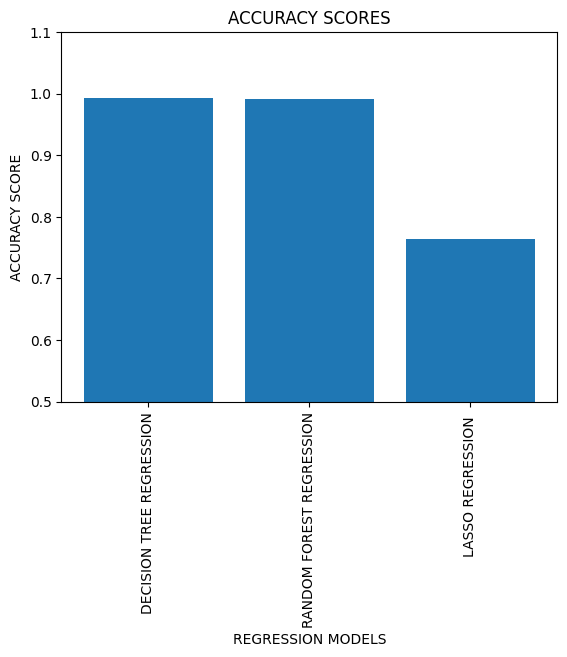

In [201]:
models = ['DECISION TREE REGRESSION', 'RANDOM FOREST REGRESSION',"LASSO REGRESSION "]
scores= [dtrscore,rfrscore ,lgr2score]

plt.bar(models, scores)
plt.xlabel('REGRESSION MODELS')
plt.xticks(rotation=90)
plt.ylim(0.5,top=1.1)
plt.ylabel('ACCURACY SCORE')
plt.title('ACCURACY SCORES')

# Show the plot
plt.show()

## model validation

In [202]:
print(Y_test[133])
X_test[133]

75000.0


array([1.994e+03, 1.000e+00, 1.100e+01, 2.000e+00, 3.760e+02, 2.080e+02,
       5.000e+00, 5.900e+01, 7.000e+00, 1.975e+03])

In [203]:
Xnew = np.array(X_test[133])
print(Xnew)


[1.994e+03 1.000e+00 1.100e+01 2.000e+00 3.760e+02 2.080e+02 5.000e+00
 5.900e+01 7.000e+00 1.975e+03]


In [204]:
X_reshaped = Xnew.reshape(1, -1)
y_predp = rfrmodel.predict(X_reshaped)
y_predp[0]

78000.0

In [205]:
value=y_predp[0]
value

78000.0

In [206]:
rfrmodel

RandomForestRegressor(n_estimators=5)

In [207]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'Year', 'Month'],
      dtype='object')

In [208]:
['Year',"Month",'town',
         'flat_type','block','street_name',
         'storey_range','floor_area_sqm','flat_model','lease_commence_date']

['Year',
 'Month',
 'town',
 'flat_type',
 'block',
 'street_name',
 'storey_range',
 'floor_area_sqm',
 'flat_model',
 'lease_commence_date']

In [209]:
sampledf={"Year":[2024],
          "Month":[6],
          "town":['ANG MO KIO'],
          "flat_type":['3 ROOM'],
          "block":['403'],
          "street_name":['ANG MO KIO AVE 10'],
          "storey_range":['10 TO 12'],
          "floor_area_sqm":[67.0],
          "flat_model":['NEW GENERATION'],
          "lease_commence_date":[1979]}

In [210]:
newdf1=pd.DataFrame(sampledf) 
newdf1

,Year,Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,2024,6,ANG MO KIO,3 ROOM,403,ANG MO KIO AVE 10,10 TO 12,67.0,NEW GENERATION,1979


In [211]:

newdf1["town"]=townle.transform(newdf1["town"]) 
newdf1["flat_type"]=flatyple.transform(newdf1["flat_type"]) 
newdf1["block"]=blockle.transform(newdf1["block"]) 
newdf1["street_name"]=streetle.transform(newdf1["street_name"]) 
newdf1["storey_range"]=rangele.transform(newdf1["storey_range"]) 
newdf1["flat_model"]=flatmodelle.transform(newdf1["flat_model"]) 

newdf1

,Year,Month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,2024,6,0,2,1110,14,5,67.0,20,1979


In [212]:
pred=rfrmodel.predict(newdf1)
pred[0]

C:\Users\puliv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


362000.0

In [213]:
with open('D:/singapore_flat_sale_prediction/RANDOMFORESTmodel.pkl', 'wb') as file:
    pickle.dump(rfrmodel, file)
with open('D:/singapore_flat_sale_prediction/townlabelencoder.pkl', 'wb') as file:
    pickle.dump(townle, file)
with open('D:/singapore_flat_sale_prediction/flattypelabelencoder.pkl', 'wb') as file:
    pickle.dump(flatyple, file)
with open('D:/singapore_flat_sale_prediction/blocklabelencoder.pkl', 'wb') as file:
    pickle.dump(blockle, file)
with open('D:/singapore_flat_sale_prediction/streetlabelencoder.pkl', 'wb') as file:
    pickle.dump(streetle, file)
with open('D:/singapore_flat_sale_prediction/flatrangelabelencoder.pkl', 'wb') as file:
    pickle.dump(rangele, file) 
with open('D:/singapore_flat_sale_prediction/flatmodellabelencoder.pkl', 'wb') as file:
    pickle.dump(flatmodelle, file) 

# saved the model and encoders